# Content

- Introduction
- Advantages and disadvantages of nonparametric methods
- Nonparametric tests
    - Sign test
    - Wilcoxon rank sum test
    - Wilcoxon signed-rank test
    - Kruskal-Wallis test
    - Runs test
- Spearman rank correlation coefficient

In [10]:
# Imports
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.stats.descriptivestats import sign_test
from statsmodels.formula.api import ols
import numpy as np
import pandas as pd
import math
import pylab
import seaborn as sns
import os

# Constants
INPUT_DIR = r'Input Data'

In [11]:
# Generic functions

def preferred_rounding(v, decimals=2):
    return str(round(v, decimals))

# Introduction

## Nonparametric statistics
Parametrics tests (e.g. z test, t test, F test) involve assumptions about the sample population (i.e. normal distribution).

**But what if the sample population is NOT normally distributed?**

In this case we can use nonparametric (distribution-free) tests.

Example of tests are:
- Sign test
- Wilcoxon rank sum test
- Wilcoxon signed-rank test
- Kruskal-Wallis test
- Runs test

## Application

Determine relationship between ranking of 2 judges and jump ability of 10 freestyle skiers.

Determine if the variation of Ketchup amount in 40 ouces bottles is by chance or due to a malfunction.

## Assumptions

1. Data randomly obtained.
2. If multiple samples, than must be independent.

## Ranking
Nonparametric tests mostly involve ranking of data (i.e. ordinal variables).

If multiple values have the same rank, then we take average to get the same total.


## Advantages and disadvantages of nonparametric methods

Even though nonparametric tests can be used in place of parametric counter parts, we cannot assume they are always a better alternative.

### Advantages
1. Can be used when sample population is not normally distributed.
2. Can be used when data is nominal (gender, eye color, etc.) or ordinal (everything placed into some kind of order or scale).
3. Can be used to test hypotheses that do not involve population parameters.

### Disadvantages
1. **Less sensitive** than parametric tests. Therefore larger differences needed before hypothesis can be rejected.
2. **Use less information** than parametric tests. E.g. the sign test requires to check only if values are above or below the median, not by how much.
3. **Less efficient** than parametric tests. Therefore larger sample sizes are needed to overcome the loss of information.

# Tests

## Sign test

### Single-sample sign test

#### Definition

Simplest nonparametric test that involves comparing the sample values with the conjectured median and count the signs.
Conjecture means conclusion formed on the basis of incomplete information.

We use this test instead of the t test if sample size <= 25. If the sample size > 25, then use z test as it does not require a normal distribution with large samples.

H0 is true if the number of + ≈ -.

#### Implementation

In [43]:
def compute_single_sample_sign_test(
    sample_list,
    median=0,
    tail='two-tailed',
    alpha=0.05,
):
    
    if tail == 'two-tailed':
        operator = '≠'
        operator_label = 'different from'
    elif tail == 'right-tailed':
        operator = '>'
        operator_label = 'more than'
    elif tail == 'left-tailed':
        operator = '<'
        operator_label = 'less than'
       
    print('H0: median = {}'.format(str(median)))
    print('H1: median {} {} (claim)'.format(operator, str(median)))
    
    m, pvalue = sign_test(sample_list, mu0=median)
    print('p-value =', preferred_rounding(pvalue, decimals=4))
    
    if pvalue <= alpha:
        print('Reject H0, median is {} {}.'.format(operator_label, str(median)))
    else:
        print('Do not reject H0, median is NOT {} {}.'.format(operator_label, str(median)))

In [46]:
# Snow cone sales
# Want to find out if median number of sells per day is 40.
# Alpha 0.05.
# p-value = 0.0075 as confirmed in the text book. And we can reject H0.

snow_cone_sales_list = [
    18, 43, 40, 16, 22,
    30, 29, 32, 37, 36,
    39, 34, 39, 45, 28,
    36, 40, 34, 39, 52,
]
compute_single_sample_sign_test(
    snow_cone_sales_list,
    median=40,
    alpha=0.05,
)

H0: median = 40
H1: median ≠ 40 (claim)
p-value = 0.0075
Reject H0, median is different from 40.


H0: median = 11
H1: median ≠ 11 (claim)
p-value = 0.0
Reject H0, median is different from 11.


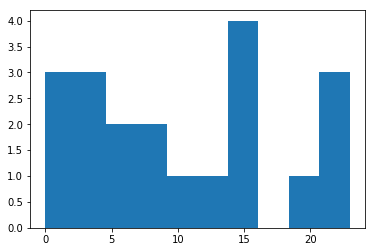

In [42]:
# Clean air
# Check if median number of days city below EPA standards is 11 days.
# Alpha 0.05.

below_epa_list = [
    15, 14, 1, 9, 0, 3, 3, 1, 10, 8,
    6, 16, 21, 22, 3, 19, 16, 5, 23, 13,
]
compute_single_sample_sign_test(
    snow_cone_sales_list,
    median=11,
    tail='two-tailed',
    alpha=0.05,
)

plt.hist(below_epa_list)
plt.show()

### Paired-sample sign test

#### Definition

Test sample means in the comparison of two dependent samples.

Mainly for **before and after tests**, however it is less powerful than the Wilcoxon signed-rank test.


#### Implementation

Check Wilcoxon signed-rank test instead.

## Wilcoxon rank sum test

### Definition



In [34]:
def compute_wilcoxon_signed_rank_test(
    array_before,
    array_after,
    tail='two-tailed',
    alpha=0.05,
):
    r"""
    The Wilcoxon signed-rank test tests the null hypothesis that two related paired samples come from the same distribution.
    In particular, it tests whether the distribution of the differences x - y is symmetric about zero. 
    It is a non-parametric version of the paired T-test.
    """
    if tail == 'two-tailed':
        operator = '≠'
        operator_label = 'different from'
    elif tail == 'right-tailed':
        operator = '>'
        operator_label = 'more than'
    elif tail == 'left-tailed':
        operator = '<'
        operator_label = 'less than'
       
    print('H0: before = after')
    print('H1: before {} after (claim)'.format(operator))
    
    stat, pvalue = stats.wilcoxon(array_before, array_after, zero_method='wilcox', correction=False)
    print('p-value =', preferred_rounding(pvalue, decimals=3))
    
    if pvalue <= alpha:
        print('Reject H0, before is {} after.'.format(operator_label))
    else:
        print('Do not reject H0, before is NOT {} after.'.format(operator_label))
        print('We do not have enough evidence to support the claim.')

In [35]:
df_ear_infections = pd.DataFrame({
    'swimmer': list('ABCDEFGHIJ'),
    'before': [3, 0, 5, 4, 2, 4, 3, 5, 2, 1],
    'after': [2, 1, 4, 0, 1, 3, 1, 3, 2, 3],
})

compute_wilcoxon_signed_rank_test(
    df_ear_infections['before'],
    df_ear_infections['after'],
    tail='right-tailed',
    alpha=0.05,
)


H0: before = after
H1: before > after (claim)
p-value = 0.13
Do not reject H0, before is NOT more than after.
We do not have enough evidence to support the claim.


c:\users\gampe\documents\ve\lib\site-packages\scipy\stats\morestats.py:2385: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
